In [1]:
import pandas as pd
import numpy as np

In [2]:
# Get the tsv files as dataframe

df_human = pd.read_table("uniprotkb_human.tsv",delimiter='\t')
df_rat = pd.read_table("uniprotkb_rat.tsv",delimiter='\t')

/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_32952/1288919342.py:3: DtypeWarning: Columns (22,29,33,35,37,38,39,40,43,44,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_human = pd.read_table("uniprotkb_human.tsv",delimiter='\t')
/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_32952/1288919342.py:4: DtypeWarning: Columns (22,29,33,35,37,38,39,40,41,43,44,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rat = pd.read_table("uniprotkb_rat.tsv",delimiter='\t')


In [3]:
#df_human

In [4]:
df_human.isna().sum()/len(df_human)

Entry                                 0.000000
Entry Name                            0.000000
Protein names                         0.000000
Gene Names                            0.207699
Organism                              0.000000
Length                                0.000000
Sequence                              0.000000
Involvement in disease                1.000000
Pharmaceutical use                    1.000000
Mutagenesis                           1.000000
Disruption phenotype                  1.000000
Biotechnological use                  1.000000
Allergenic Properties                 1.000000
Gene Ontology (biological process)    0.619481
Gene Ontology (cellular component)    0.543190
Gene Ontology (GO)                    0.418790
Gene Ontology (molecular function)    0.664311
Absorption                            1.000000
Catalytic activity                    0.920414
Cofactor                              0.957372
DNA binding                           0.992416
EC number    

### All the steps done on the Human dataset will be repeated on the rat dataset (as the human features might be used later)

In [5]:
# remove all the empty columns and columns with mostly NaN
df_human = df_human.drop(columns=['Entry','Entry Name','Involvement in disease',
       'Pharmaceutical use','Mutagenesis','Disruption phenotype','Biotechnological use',
       'Allergenic Properties','Absorption','Kinetics','pH dependence','Redox potential',
       'Temperature dependence','Peptide','Propeptide','Catalytic activity', 'Cofactor',
       'DNA binding', 'EC number', 'Activity regulation', 'Function [CC]',
       'Pathway', 'Rhea ID', 'Site', 'Binding site', 'Chain', 'Cross-link',
       'Disulfide bond', 'Glycosylation', 'Modified residue', 'Lipidation',
       'Initiator methionine', 'Post-translational modification',
       'Signal peptide', 'Transit peptide', 'Topological domain','Transmembrane','Intramembrane'])
df_rat = df_rat.drop(columns=['Entry','Entry Name','Involvement in disease',
       'Pharmaceutical use','Mutagenesis','Disruption phenotype','Biotechnological use',
       'Allergenic Properties','Absorption','Kinetics','pH dependence','Redox potential',
       'Temperature dependence','Peptide','Propeptide','Catalytic activity', 'Cofactor',
       'DNA binding', 'EC number', 'Activity regulation', 'Function [CC]',
       'Pathway', 'Rhea ID', 'Site', 'Binding site', 'Chain', 'Cross-link',
       'Disulfide bond', 'Glycosylation', 'Modified residue', 'Lipidation',
       'Initiator methionine', 'Post-translational modification',
       'Signal peptide', 'Transit peptide', 'Topological domain','Transmembrane','Intramembrane'])

In [6]:
#df_human['Gene Ontology (biological process)'].value_counts(dropna=False)

In [7]:
# Decided to keep only the first part of the Gene Ontology columns (only the part before the first [GO])

# A regex pattern that captures everything until the first '[GO:'

df_human['Gene Ontology (biological process)'] = df_human['Gene Ontology (biological process)'].str.extract(r'^(.*?)(?=\[GO:)')
df_human['Gene Ontology (cellular component)'] = df_human['Gene Ontology (cellular component)'].str.extract(r'^(.*?)(?=\[GO:)')
df_human['Gene Ontology (GO)'] = df_human['Gene Ontology (GO)'].str.extract(r'^(.*?)(?=\[GO:)')
df_human['Gene Ontology (molecular function)'] = df_human['Gene Ontology (molecular function)'].str.extract(r'^(.*?)(?=\[GO:)')

In [8]:
df_rat['Gene Ontology (biological process)'] = df_rat['Gene Ontology (biological process)'].str.extract(r'^(.*?)(?=\[GO:)')
df_rat['Gene Ontology (cellular component)'] = df_rat['Gene Ontology (cellular component)'].str.extract(r'^(.*?)(?=\[GO:)')
df_rat['Gene Ontology (GO)'] = df_rat['Gene Ontology (GO)'].str.extract(r'^(.*?)(?=\[GO:)')
df_rat['Gene Ontology (molecular function)'] = df_rat['Gene Ontology (molecular function)'].str.extract(r'^(.*?)(?=\[GO:)')

In [9]:
#df_human['Subcellular location [CC]'].value_counts(dropna=False)

In [10]:
# Decided to keep the subcelluar, could be used later for specifically predicting specific proteins

# A regex pattern that captures everything between the SUBCELLULAR LOCATION:  and the first {ECO:

df_human['Subcellular location [CC]'] = df_human['Subcellular location [CC]'].str.extract(r'(?<=SUBCELLULAR LOCATION: )(.*?)(?=\s*{ECO:)')

In [11]:
df_rat['Subcellular location [CC]'] = df_rat['Subcellular location [CC]'].str.extract(r'(?<=SUBCELLULAR LOCATION: )(.*?)(?=\s*{ECO:)')

In [12]:
print('Human Protein sequences over 500 length', len(df_human[df_human['Length']>500]))
print('Rat Protein sequences over 500 length', len(df_rat[df_rat['Length']>500]))

Human Protein sequences over 500 length 23884
Rat Protein sequences over 500 length 25999


In [13]:
# Decided to drop all the sequences that are above 500 aa in length (currently for the ease of modelling)

df_human = df_human[df_human['Length']<500]
df_rat = df_rat[df_rat['Length']<500]

In [14]:
print(df_human.shape)
print(df_rat.shape)

(163564, 10)
(58777, 10)


In [15]:
df_human.isna().sum()/len(df_human)

Protein names                         0.000000
Gene Names                            0.201811
Organism                              0.000000
Length                                0.000000
Sequence                              0.000000
Gene Ontology (biological process)    0.650149
Gene Ontology (cellular component)    0.573837
Gene Ontology (GO)                    0.459288
Gene Ontology (molecular function)    0.712730
Subcellular location [CC]             0.787196
dtype: float64

In [16]:
df_rat.isna().sum()/len(df_human)

Protein names                         0.000000
Gene Names                            0.009140
Organism                              0.000000
Length                                0.000000
Sequence                              0.000000
Gene Ontology (biological process)    0.243770
Gene Ontology (cellular component)    0.229989
Gene Ontology (GO)                    0.195978
Gene Ontology (molecular function)    0.233401
Subcellular location [CC]             0.258841
dtype: float64

In [17]:
# Fill all the NaN with unknown
df_human = df_human.fillna('Unknown')
df_rat = df_rat.fillna('Unknown')

In [18]:
df_human.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,163564.0,187.356111,113.216307,7.0,104.0,177.0,258.0,499.0


In [19]:
df_rat.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,58777.0,228.405073,134.996033,1.0,110.0,217.0,334.0,499.0


In [20]:
# Make new dfs with only the Sequence and Organism columns to start the model.

df_human_seq = df_human[['Sequence','Organism']]
df_rat_seq = df_rat[['Sequence','Organism']]

In [21]:
# To make it easier to read change the Organism to Human or Rat respectivelly

df_human_seq['Organism'] = df_human_seq['Organism'].replace(['Homo sapiens (Human)'], 'Human').astype('object')
df_rat_seq['Organism'] = df_rat_seq['Organism'].replace(['Rattus norvegicus (Rat)'], 'Rat').astype('object')

/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_32952/118057391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_human_seq['Organism'] = df_human_seq['Organism'].replace(['Homo sapiens (Human)'], 'Human').astype('object')
/var/folders/q2/_chm3qg94gz5l7r736h39n040000gn/T/ipykernel_32952/118057391.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rat_seq['Organism'] = df_rat_seq['Organism'].replace(['Rattus norvegicus (Rat)'], 'Rat').astype('object')


In [22]:
pd.set_option('display.max_colwidth', None)

### Concat both df by row to continue workin with the resulting df

In [23]:
df_seq = pd.concat((df_human_seq, df_rat_seq), axis = 0).reset_index(drop=True)

In [24]:
df_seq

,Sequence,Organism
0,MAKDILGEAGLHFDELNKLRVLDPEVTQQTIELKEECKDFVDKIGQFQKIVGGLIELVDQLAKEAENEKMKAIGARNLLKSIAKQREAQQQQLQALIAEKKMQLERYRVEYEALCKVEAEQNEFIDQFIFQK,Human
1,MGGCAGSRRRFSDSEGEETVPEPRLPLLDHQGAHWKNAVGFWLLGLCNNFSYVVMLSAAHDILSHKRTSGNQSHVDPGPTPIPHNSSSRFDCNSVSTAAVLLADILPTLVIKLLAPLGLHLLPYSPRVLVSGICAAGSFVLVAFSHSVGTSLCGVVFASISSGLGEVTFLSLTAFYPRAVISWWSSGTGGAGLLGALSYLGLTQAGLSPQQTLLSMLGIPALLLASYFLLLTSPEAQDPGGEEEAESAARQPLIRTEAPESKPGSSSSLSLRERWTVFKGLLWYIVPLVVVYFAEYFINQGLFELLFFWNTSLSHAQQYRWYQMLYQAGVFASRSSLRCCRIRFTWALALLQCLNLVFLLADVWFGFLPSIYLVFLIILYEGLLGGAAYVNTFHNIALETSDEHREFAMAATCISDTLGISLSGLLALPLHDFLCQLS,Human
2,MSGGGPSGGGPGGSGRARTSSFAEPGGGGGGGGGGPGGSASGPGGTGGGKASVGAMGGGVGASSSGGGPGGSGGGGSGGPGAGTSFPPPGVKLGRDSGKVTTVVATLGQGPERSQEVAYTDIKVIGNGSFGVVYQARLAETRELVAIKKVLQDKRFKNRELQIMRKLDHCNIVRLRYFFYSSGEKKDELYLNLVLEYVPETVYRVARHFTKAKLTIPILYVKVYMYQLFRSLAYIHSQGVCHRDIKPQNLLVDPDTAVLKLCDFGSAKQLVRGEPNVSYICSRYYRAPELIFGATDYTSSIDVWSAGCVLAELLLGQPIFPGDSGVDQLVEIIKVLGTPTREQIREMNPNYTEFKFPQIKAHPWTKVFKSRTPPEAIALCSSLLEYTPSSRLSPLEACAHSFFDELRCLGTQLPNNRPLPPLFNFSAGELSIQPSLNAILIPPHLRSPAGTTTLTPSSQALTETPTSSDWQSTDATPTLTNSS,Human
3,MVRTKTWTLKKHFVGYPTNSDFELKTSELPPLKNGEVLLEALFLTVDPYMRVAAKRLKEGDTMMGQQVAKVVESKNVALPKGTIVLASPGWTTHSISDGKDLEKLLTEWPDTIPLSLALGTVGMPGLTAYFGLLEICGVKGGETVMVNAAAGAVGSVVGQIAKLKGCKVVGAVGSDEKVAYLQKLGFDVVFNYKTVESLEETLKKASPDGYDCYFDNVGGEFSNTVIGQMKKFGRIAICGAISTYNRTGPLPPGPPPEIVIYQELRMEAFVVYRWQGDARQKALKDLLKWVLEGKIQYKEYIIEGFENMPAAFMGMLKGDNLGKTIVKA,Human
4,MEGSKTSNNSTMQVSFVCQRCSQPLKLDTSFKILDRVTIQELTAPLLTTAQAKPGETQEEETNSGEEPFIETPRQDGVSRRFIPPARMMSTESANSFTLIGEASDGGTMENLSRRLKVTGDLFDIMSGQTDVDHPLCEECTDTLLDQLDTQLNVTENECQNYKRCLEILEQMNEDDSEQLQMELKELALEEERLIQELEDVEKNRKIVAENLEKVQAEAERLDQEEAQYQREYSEFKRQQLELDDELKSVENQMRYAQTQLDKLKKTNVFNATFHIWHSGQFGTINNFRLGRLPSVPVEWNEINAAWGQTVLLLHALANKMGLKFQRYRLVPYGNHSYLESLTDKSKELPLYCSGGLRFFWDNKFDHAMVAFLDCVQQFKEEVEKGETRFCLPYRMDVEKGKIEDTGGSGGSYSIKTQFNSEEQWTKALKFMLTNLKWGLAWVSSQFYNK,Human
...,...,...
222336,FVCSYSAAPEEKNGFKPAQEHLDSKARRAHVDPSVERYG,Rat
222337,FVCSYSAAPEEKNGFKPAQEHLDSKARRAHEDLSSSQVGYSEDKQLTESDVIDTTTSREDTSPAYGCKHAAILNSKNTKKVLEVPVKTSQEEEPAASQSQQVSCGEELASERTKIPSASLVQLSKESLFLLDASKEGNVGRFLNHSCYPNLWVQNVFVETHDRNFPLAAFFTNRFLSGYREDGEEDMCPLP,Rat
222338,FVCSYSAAPEEKNGFKPAQEHLDSKARRAHEDLSSSQVGYSEDKQLTESDVIDTTTSREDTSPAYGCKHAAILNSKNTKKVLEVPVKTSQEEEPAASQSQQVSCGEELASERTKIPSASLVQLSKESLFLLDASKEGNVGRFLNLLPKSLGAERVCRNP,Rat
222339,CPGKDSDIISTVEFNHTGELLATGDKGGRVVIFQREQEVFTEAQTPAVVLGSVLQVLKFNLPSLQSKNQVHRRGEYNVYSTFQSHEPEFDYLKSLEIEEKINKIRWLPQQNAAYFLLSTNDKTVKLWKVSERDKRPEGYNLKDEEGRLRDPATITTLRVPVLRPMDLMVEATPRRVFANAHTYHINSISVNSDYETYMSADDLRINLWNFEITNQSFNIVDIKPANMEELTEVITAAEFHPHHCNTFVYSSSKGTIRLCDMRASALCDRHTKFFEEPEDPSNRSFFSEIISSISDVKFSHSGRYIMTRDYLTAKVWDLNMENRPVETYQVHDYLRSKLCSLYENDCIFDKFECVWNGSDSVIMTGSYNNFFRMFDRNTKRDVTLEASRENSKPRAILKPRKVCVGGKRRKDEISVDSLDFSKKILHTAWHPSENIIAVAATNNLYIFQDKVN,Rat


## Tokenize the Protein Sequence

In [25]:
df_seq['Token_Sequence'] = df_seq['Sequence'].apply(list)

In [26]:
df_seq.head(1)

,Sequence,Organism,Token_Sequence
0,MAKDILGEAGLHFDELNKLRVLDPEVTQQTIELKEECKDFVDKIGQFQKIVGGLIELVDQLAKEAENEKMKAIGARNLLKSIAKQREAQQQQLQALIAEKKMQLERYRVEYEALCKVEAEQNEFIDQFIFQK,Human,"[M, A, K, D, I, L, G, E, A, G, L, H, F, D, E, L, N, K, L, R, V, L, D, P, E, V, T, Q, Q, T, I, E, L, K, E, E, C, K, D, F, V, D, K, I, G, Q, F, Q, K, I, V, G, G, L, I, E, L, V, D, Q, L, A, K, E, A, E, N, E, K, M, K, A, I, G, A, R, N, L, L, K, S, I, A, K, Q, R, E, A, Q, Q, Q, Q, L, Q, A, L, I, A, E, K, ...]"


In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

2023-09-26 02:16:20.958364: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## RNN Model (LSTM) Classifier
Predict wether a protein sequence is human or rat protein

In [28]:
# Convert sequences to integer tokens

tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(df_seq['Token_Sequence'].apply(lambda x: ''.join(x)))
X = tokenizer.texts_to_sequences(df_seq['Token_Sequence'].apply(lambda x: ''.join(x)))

In [29]:
# Pad the sequences to have the same length
X = pad_sequences(X, padding='post')

In [30]:
# Convert 'Human' and 'Rat' to integers

y = df_seq['Organism'].map({'Human': 0, 'Rat': 1}).values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=10))
model.add(LSTM(50, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
5559/5559 [==============================] - 1048s 188ms/step - loss: 0.4709 - accuracy: 0.7344 - val_loss: 0.4592 - val_accuracy: 0.7363
Epoch 2/10
5559/5559 [==============================] - 1017s 183ms/step - loss: 0.4454 - accuracy: 0.7407 - val_loss: 0.4444 - val_accuracy: 0.7448
Epoch 3/10
5559/5559 [==============================] - 1017s 183ms/step - loss: 0.4356 - accuracy: 0.7484 - val_loss: 0.4335 - val_accuracy: 0.7505
Epoch 4/10
5559/5559 [==============================] - 1016s 183ms/step - loss: 0.4279 - accuracy: 0.7535 - val_loss: 0.4315 - val_accuracy: 0.7503
Epoch 5/10
5559/5559 [==============================] - 1027s 185ms/step - loss: 0.4220 - accuracy: 0.7585 - val_loss: 0.4258 - val_accuracy: 0.7556
Epoch 6/10
5559/5559 [==============================] - 1026s 185ms/step - loss: 0.4187 - accuracy: 0.7594 - val_loss: 0.4250 - val_accuracy: 0.7560
Epoch 7/10
5559/5559 [==============================] - 1022s 184ms/step - loss: 0.4149 - accuracy: 0.7634

In [35]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

1390/1390 [==============================] - 62s 44ms/step - loss: 0.4142 - accuracy: 0.7615
Test Loss: 0.4142
Test Accuracy: 0.7615


In [36]:
# Get the predictions for the test set
predictions = model.predict(X_test)

# Convert predictions to binary labels
predicted_labels = [1 if p >= 0.5 else 0 for p in predictions]

# Compare predicted labels with the actual labels
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_labels})
print(comparison)

1390/1390 [==============================] - 61s 43ms/step
       Actual  Predicted
0           0          0
1           1          1
2           0          0
3           0          0
4           0          0
...       ...        ...
44464       0          0
44465       0          0
44466       1          0
44467       1          0
44468       0          0

[44469 rows x 2 columns]


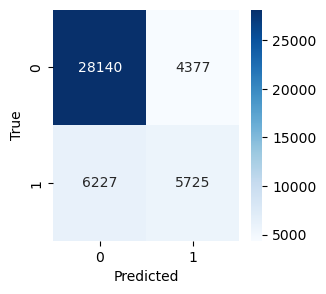

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(3,3))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## RNN Model (LSTM)
Predict new protein sequences not seen in the data

In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:

tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(df_seq['Token_Sequence'].apply(lambda x: ''.join(x)))
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for sequence in df_seq['Token_Sequence']:
    token_sequence = tokenizer.texts_to_sequences([sequence])[0]
    for i in range(1, len(token_sequence)):
        n_gram_sequence = token_sequence[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences and split input and output
input_sequences = pad_sequences(input_sequences)
X, y = input_sequences[:,:-1],input_sequences[:,-1]
y = to_categorical(y, num_classes=total_words)


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=50, input_length=X.shape[1]))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=10, verbose=1)


In [ ]:
def generate_sequence(model, tokenizer, init_seq, max_length):
    new_sequence = init_seq
    for _ in range(max_length):
        token_sequence = tokenizer.texts_to_sequences([new_sequence])[0]
        token_sequence = pad_sequences([token_sequence], maxlen=X.shape[1], padding='pre')
        predicted_token = np.argmax(model.predict(token_sequence), axis=-1)
        predicted_amino_acid = tokenizer.index_word[predicted_token[0]]
        new_sequence += predicted_amino_acid
    return new_sequence

# Generate a new sequence of length 50 starting with the sequence 'MKT'
print(generate_sequence(model, tokenizer, "MKT", 50))
